<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAB-02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN<Title>
</div>

<h2>Nhóm 23</h2>
<h3>Thông tin nhóm:</h3>


<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Công Đắt     | 20120454  |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Lê Trần Như Ngọc       | 21120296  |
| Lê Thị Minh Phương | 21120533  |

</center>


<h2>Giảng viên hướng dẫn:</h2>

### **Thầy Lê Nhựt Nam**

<h2>Chủ đề:</h2>

## ***Phân tích và trực quan giá cổ phiếu của top 6 ngân hàng có giá trị thương hiệu tốt nhất Việt Nam***

---


# **Phần C: Khám phá mối quan hệ trong dữ liệu.**
## **C02. Phân tích biến động về giá cổ phiếu của các ngân hàng qua thời gian**

#### ***Sơ lược nội dung:***
1. Đánh giá biến động về giá theo thời gian dựa vào giá trung bình của các ngân hàng theo thời gian?
2. Trung bình Change (%) của các ngân hàng theo từng năm nói lên điều gì?
3. Phân tích sự biến động giá cổ phiếu của VPBank, Agribank, VietinBank, Techcombank vào năm 2021 và 2022?

## **I. Chuẩn bị** 

### 1. Nhập các thư viện

In [18]:
# thêm thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")


### 2. Nhập dữ liệu

In [19]:
df = pd.read_csv("../Datasets/full_data_processed.csv")
data = pd.read_csv('../Datasets/full_data_processed.csv')

## **II. Phân tích và trực quan hoá.** <a id=”ii-phân-tích-và-trực-quan-hoá″></a>

### **1. Đánh giá biến động về giá theo thời gian dựa vào giá trung bình của các ngân hàng theo thời gian?**

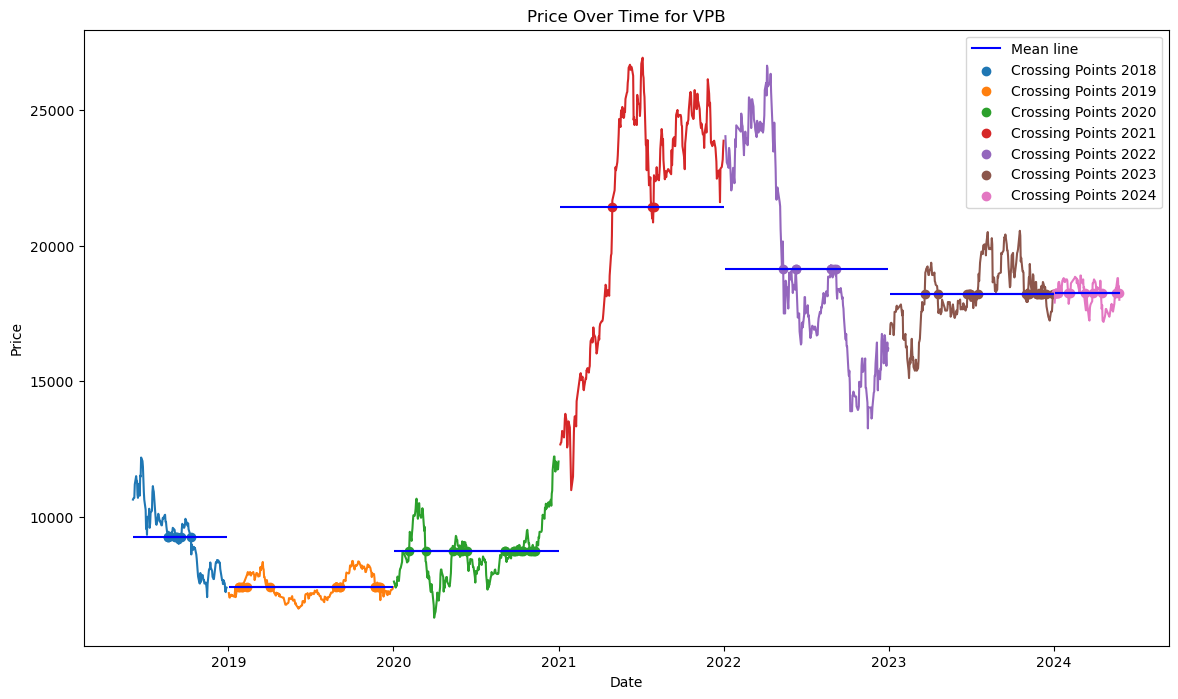

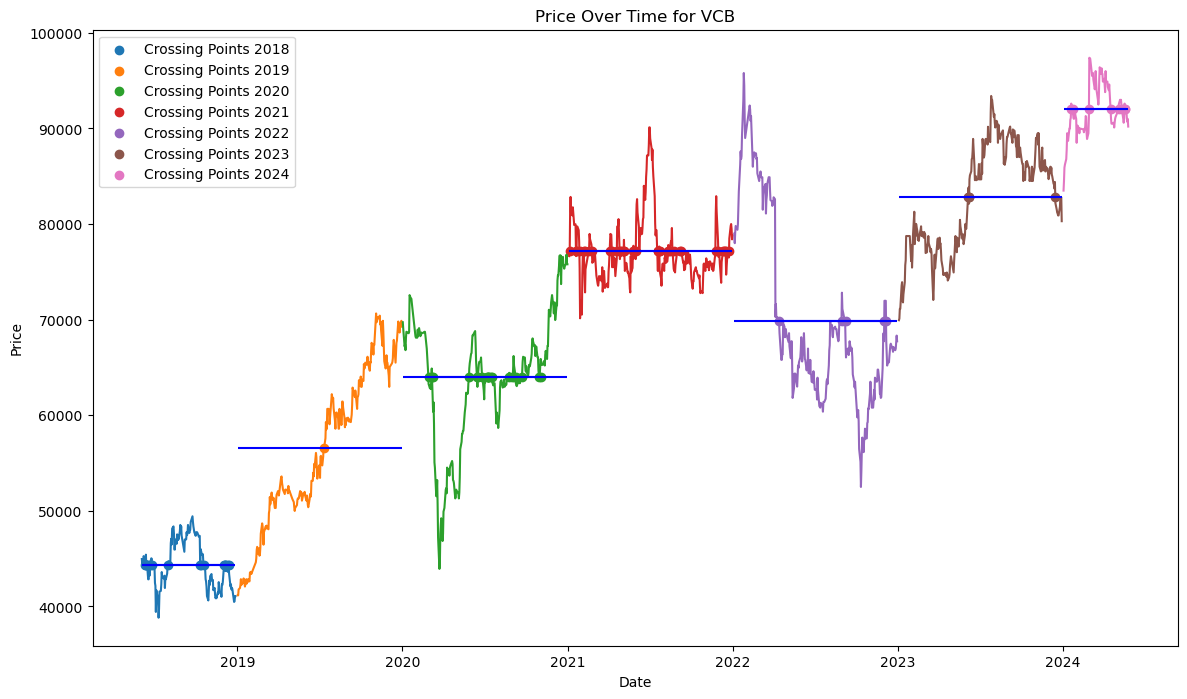

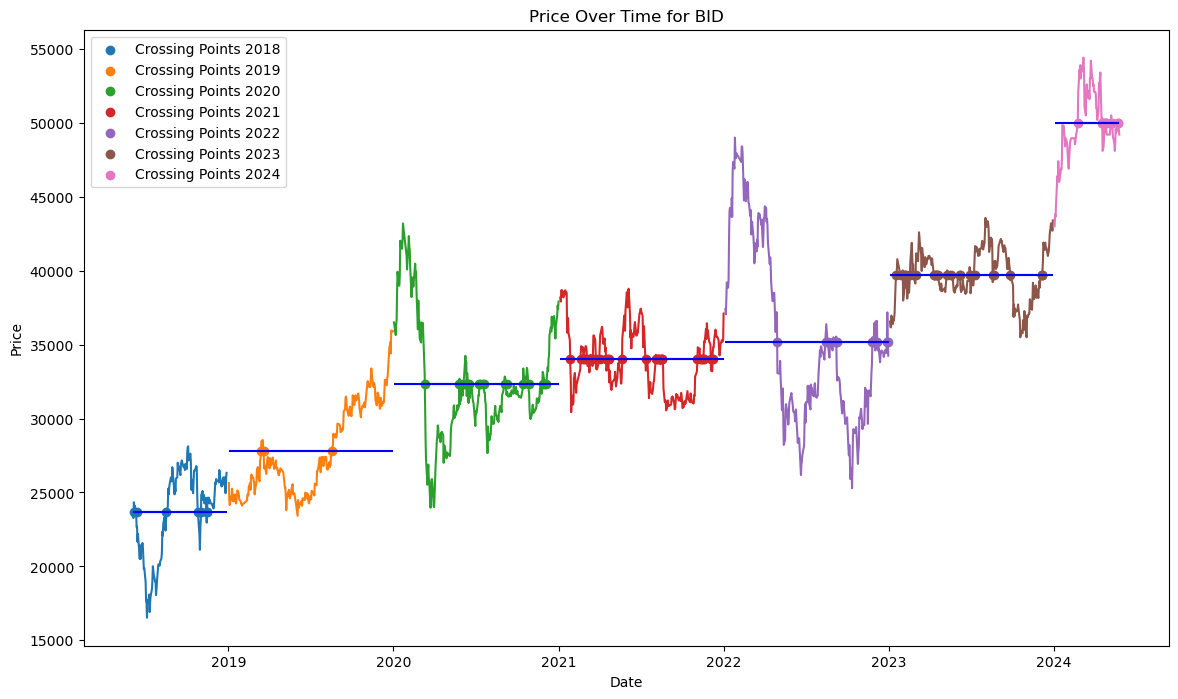

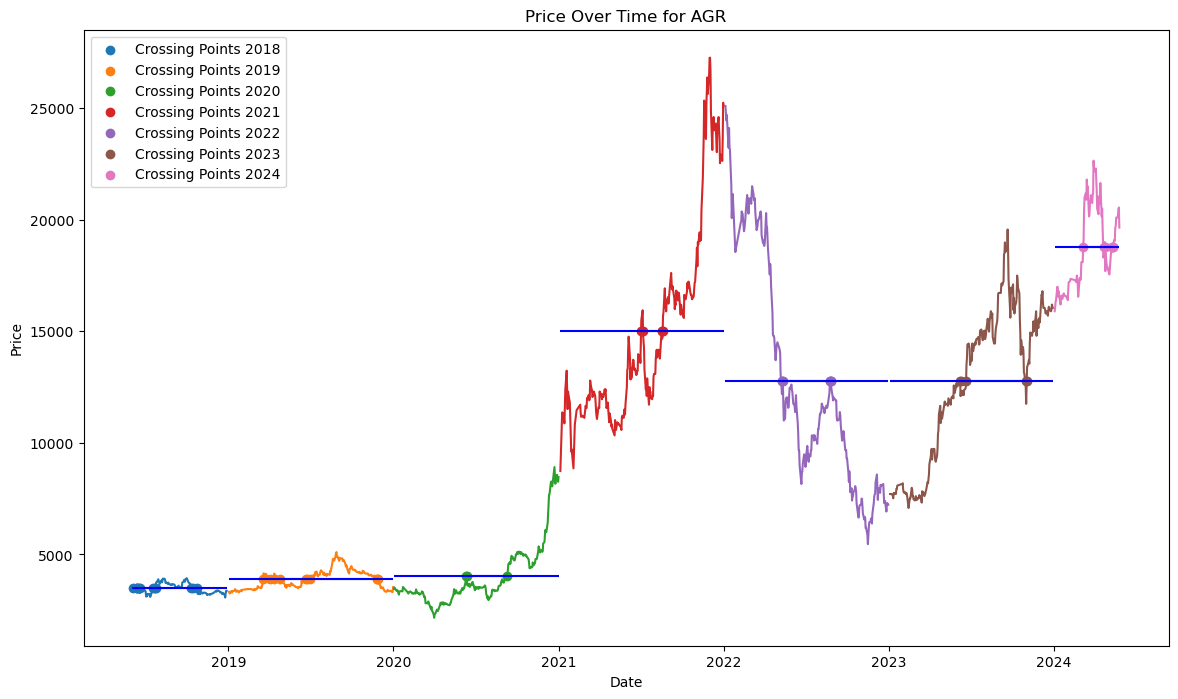

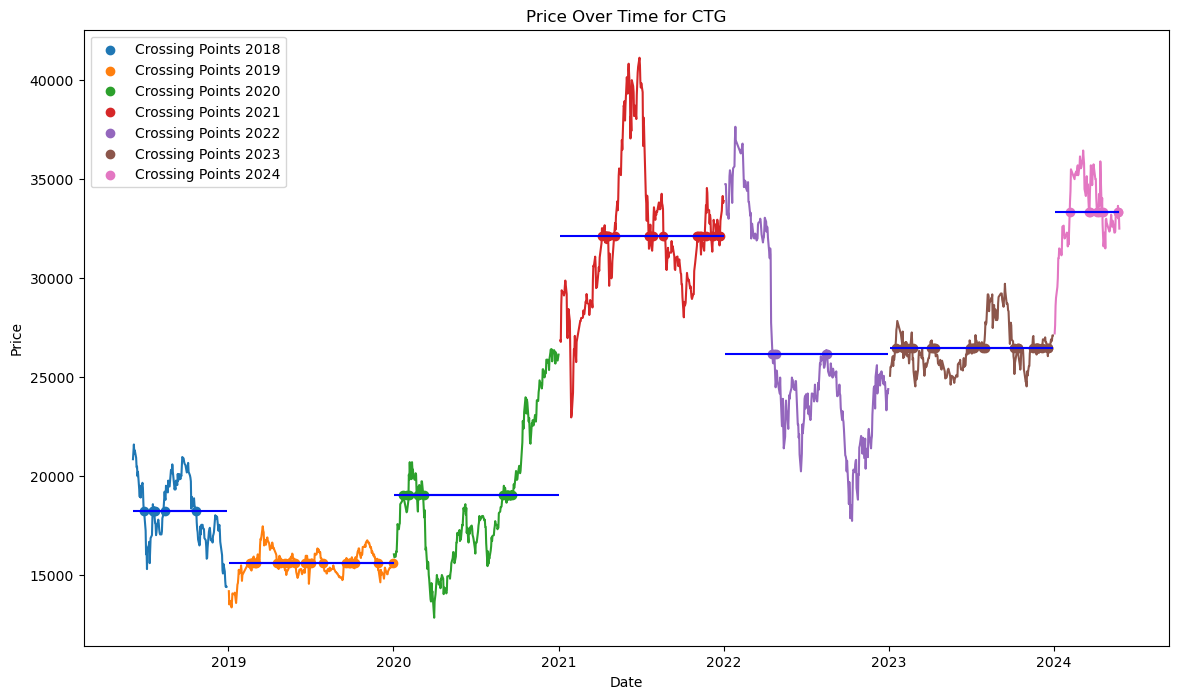

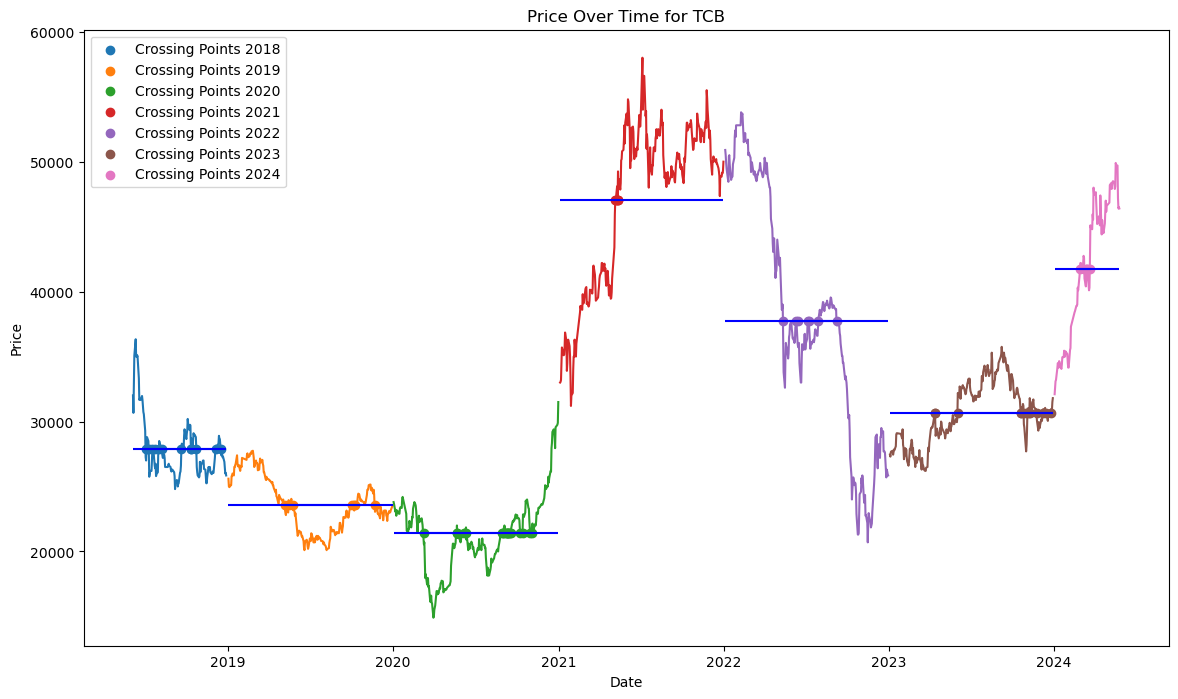

In [20]:
# Đảm bảo rằng cột 'Date' được chuyển đổi thành datetime
df['Date'] = pd.to_datetime(df['Date'])

# Thêm cột 'Year' để lưu trữ năm của mỗi ngày
df['Year'] = df['Date'].dt.year

# Lấy danh sách các ngân hàng
banks = df['Stock symbol'].unique()
flag = 1
# Lặp qua từng ngân hàng và vẽ biểu đồ
for bank in banks:
    bank_data = df[df['Stock symbol'] == bank]
    
    # Thiết lập biểu đồ
    plt.figure(figsize=(14, 8))
    
    # Lấy danh sách các năm
    years = bank_data['Year'].unique()
    
    for year in years:
        yearly_data = bank_data[bank_data['Year'] == year]
        average_price = yearly_data['Price'].mean()
        # Vẽ đường giá trung bình
        plt.plot(yearly_data['Date'], yearly_data['Price'], )
        # Vẽ đoạn thẳng đại diện cho giá trị trung bình của năm
        start_date = yearly_data['Date'].min()
        end_date = yearly_data['Date'].max()
        if year == 2018:
            plt.hlines(y=average_price, xmin=start_date, xmax=end_date, colors='b',)
        else:
            plt.hlines(y=average_price, xmin=start_date, xmax=end_date, colors='b',label="")


    # Thêm các điểm cắt giữa giá cổ phiếu và đường trung bình
    for year in years:
        yearly_data = bank_data[bank_data['Year'] == year]
        average_price = yearly_data['Price'].mean()
        crossing_points = yearly_data[(yearly_data['Price'] > average_price) != (yearly_data['Price'] > average_price).shift(1)]
        y_value = [average_price] * len(crossing_points)

        # Bỏ điểm đầu tiên
        if not crossing_points.empty:
            crossing_points = crossing_points.iloc[1:]
        
        # Vẽ đoạn thẳng
        if not crossing_points.empty:
            if flag == 1:
                plt.plot(crossing_points['Date'], [average_price] * len(crossing_points), label='Mean line',color= 'blue')
                flag = 2
            plt.plot(crossing_points['Date'], [average_price] * len(crossing_points),color= 'blue')
        plt.scatter(crossing_points['Date'], [average_price] * len(crossing_points), label=f'Crossing Points {year}')

        
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Price Over Time for {bank}')
    plt.legend()

    # Hiển thị biểu đồ
    plt.show()

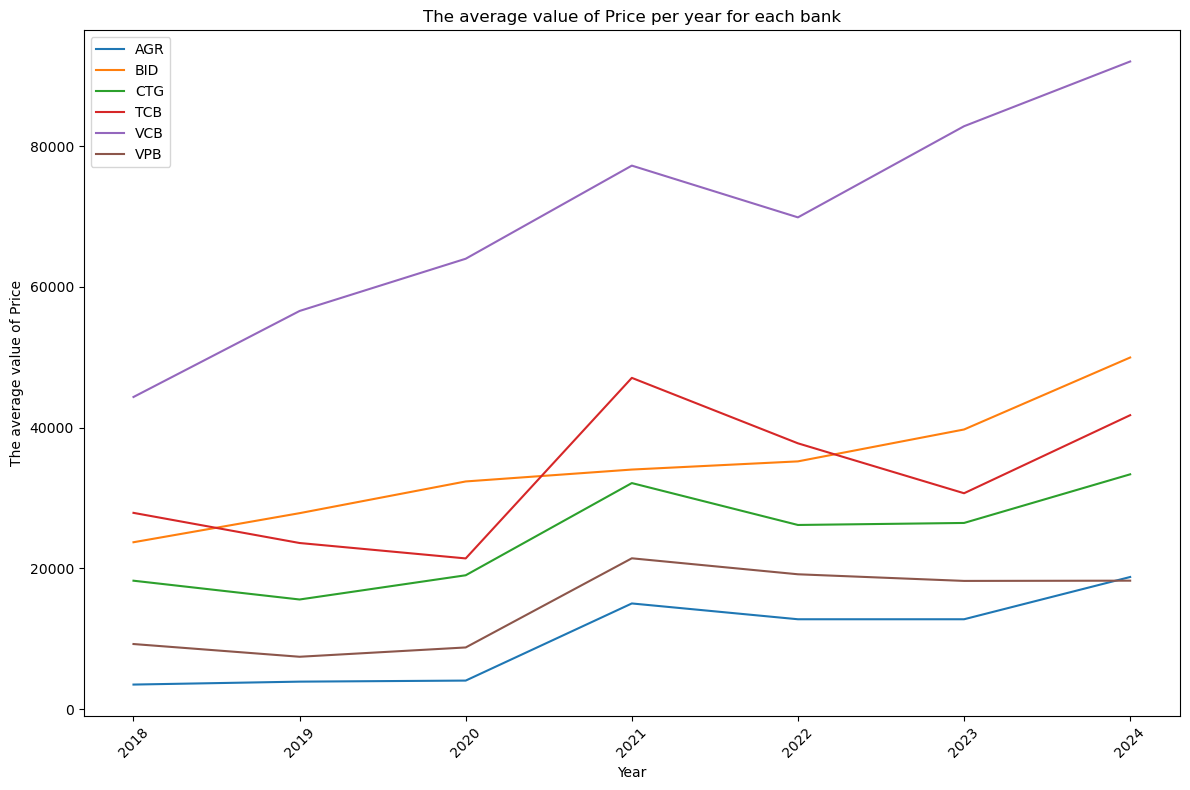

In [21]:
# Đọc dữ liệu từ DataFrame
df = pd.read_csv("../Datasets/full_data_processed.csv")

# Tính giá trị trung bình của price cho từng ngân hàng theo từng năm
average_prices_by_year = df.groupby(['Stock symbol', df['Date'].str[:4]])['Price'].mean()

# Biến đổi dữ liệu thành một DataFrame để dễ quản lý
average_prices_by_year_df = average_prices_by_year.reset_index(name='Average Price')

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Lặp qua từng ngân hàng
for bank in average_prices_by_year_df['Stock symbol'].unique():
    bank_data = average_prices_by_year_df[average_prices_by_year_df['Stock symbol'] == bank]
    plt.plot(bank_data['Date'], bank_data['Average Price'], label=bank)

# Đặt tiêu đề và nhãn
plt.title('The average value of Price per year for each bank')
plt.xlabel('Year')
plt.ylabel('The average value of Price')
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Nhận xét:**<br>
***1. Nhận xét về mức tăng trưởng:***<br><br>
- VPBank (VPB): VPBank đã trải qua sự biến động từ mức giảm đáng kể vào năm 2019 đến mức tăng mạnh mẽ vào năm 2021, sau đó duy trì ở mức cao trong các năm sau đó.<br>
- Vietcombank (VCB): Vietcombank có mức tăng trưởng ấn tượng và liên tục từ năm 2018 đến 2024, đặc biệt là tăng mạnh từ năm 2023 đến 2024.<br>
- BIDV (BID): BIDV cũng có mức tăng trưởng liên tục qua các năm, đặc biệt là tăng đột biến vào năm 2024.<br>
- Agribank (AGR): Agribank có sự tăng trưởng đáng kể từ năm 2023 đến 2024 sau một giai đoạn ổn định trong các năm trước đó.<br>
- VietinBank (CTG): VietinBank cũng trải qua một giai đoạn tăng trưởng mạnh mẽ từ năm 2023 đến 2024 sau một giai đoạn biến động.<br>
- Techcombank (TCB): Techcombank có mức tăng trưởng đáng kể trong giai đoạn 2021-2022, sau đó duy trì ổn định trong các năm sau đó.<br>
    
***Tóm lại:*** <br>
Các cổ phiếu như Vietcombank, BIDV và VietinBank đã có tốc độ tăng trưởng cao trong giai đoạn 2018-2024. Ví dụ, Vietcombank đã có mức tăng trưởng từ khoảng 44,344.03 năm 2018 lên đến 92,021.05 năm 2024, chỉ trong vòng 6 năm. Tốc độ tăng trưởng của các cổ phiếu này có thể được coi là ấn tượng và cho thấy sự phát triển mạnh mẽ của các công ty trong thời gian này.<br><br>
Các cổ phiếu khác như VPBank, Agribank và Techcombank cũng đã có tốc độ tăng trưởng trung bình, không đạt được mức độ tăng trưởng cao như Vietcombank, BIDV và VietinBank.<br><br><br>
***2. Nhận xét về mối liên hệ giữa số lần đi qua giá trị trung bình và thời gian giữa các lần:***<br>
* Khi giá cổ phiếu dao động xung quanh vị trí trung bình trong một khoảng thời gian, đặc biệt là trong một khoảng thời gian dài, điều này có thể cho thấy xu hướng ổn định của cổ phiếu đó trên thị trường trong giai đoạn đó. vd: BIDV<br>
* Giữa 2 điểm liên tục là 1 chu kỳ tăng giảm hoặc giảm tăng, tùy thời gian giữa các lần có thể đánh giá số lần thị trường biến động ít hay nhiều, thị trường đang có xu hướng (trend) hay không.

### **2. Dữ liệu trung bình change(%) qua các năm của các ngân hàng**

In [22]:
# Đặt khoảng thời gian
start_year = 2018
end_year = 2024

# Tạo một DataFrame trống để lưu dữ liệu
data_list = []

# Lặp qua từng năm
for year in range(start_year, end_year + 1):
    # Lọc dữ liệu theo năm
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_df = df[mask]

    # Tính giá trị trung bình của Change % cho từng ngân hàng trong năm đó
    average_change = filtered_df.groupby('Stock symbol')['Change %'].mean()

    # Lưu dữ liệu vào danh sách
    for bank, avg_change in average_change.items():
        data_list.append({
            'Bank': bank,
            'Year': year,
            'Average Change': avg_change
        })

# Tạo DataFrame từ danh sách dữ liệu
df_to_save = pd.DataFrame(data_list)

# Lưu DataFrame vào file CSV
csv_filename = '../Datasets/average_change_data.csv'
df_to_save.to_csv(csv_filename, index=False)
print(f"Dữ liệu đã được lưu vào file CSV: {csv_filename}")

Dữ liệu đã được lưu vào file CSV: ../Datasets/average_change_data.csv


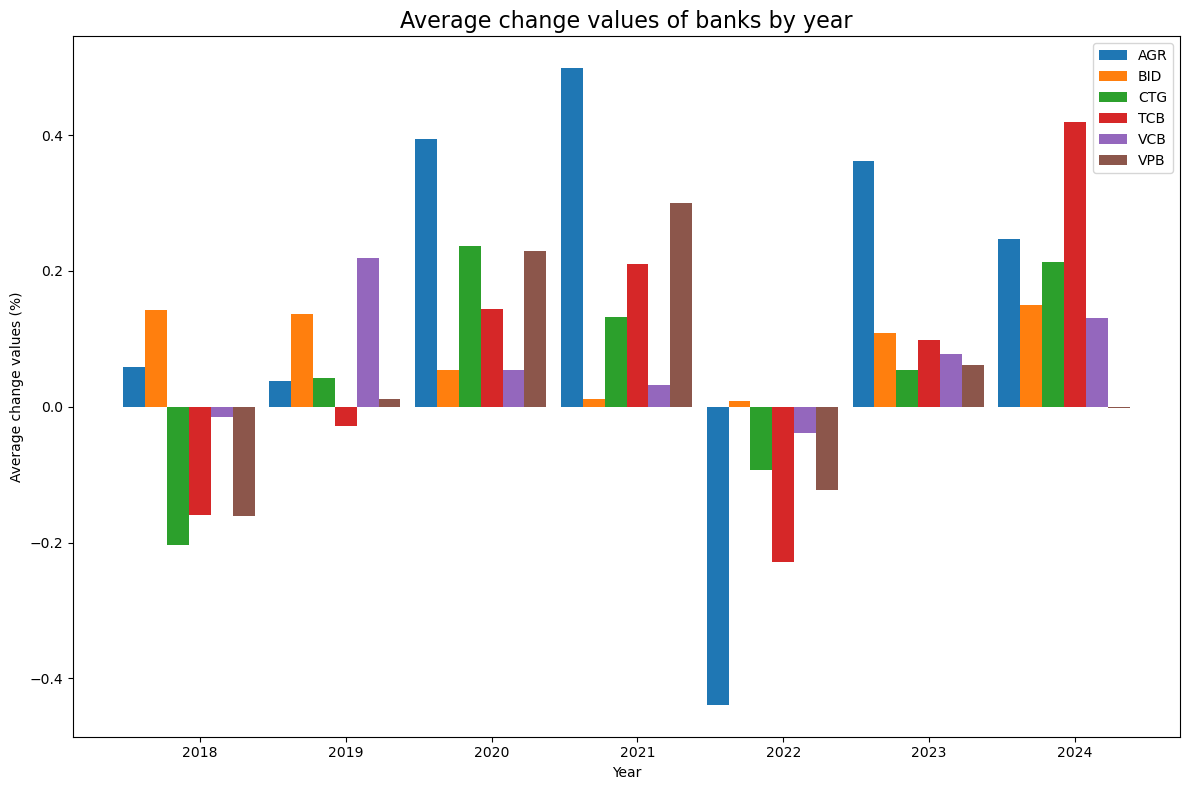

In [23]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('../Datasets/average_change_data.csv')

# Tạo một dictionary rỗng để lưu dữ liệu
average_prices = {}

# Lặp qua từng dòng trong DataFrame và thêm dữ liệu vào dictionary
for index, row in df.iterrows():
    bank = row['Bank']
    year = row['Year']
    average_change = row['Average Change']
    
    if bank not in average_prices:
        average_prices[bank] = {}
    
    average_prices[bank][year] = average_change


# Tạo các dữ liệu cần thiết cho biểu đồ cột
years = list(average_prices["AGR"].keys())
banks = list(average_prices.keys())
num_years = len(years)
bar_width = 0.15
index = np.arange(num_years)

# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))

for i, bank in enumerate(banks):
    avg_prices = [average_prices[bank][year] for year in years]
    ax.bar(index + i * bar_width, avg_prices, bar_width, label=bank)

# Đặt tiêu đề và nhãn trục
ax.set_title('Average change values of banks by year', fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('Average change values (%)')

# Đặt các chỉ mục cho nhãn trục x và hiển thị nhãn trục x
ax.set_xticks(index + bar_width * (num_years - 1) / 2)
ax.set_xticklabels(years)

# Hiển thị chú thích
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

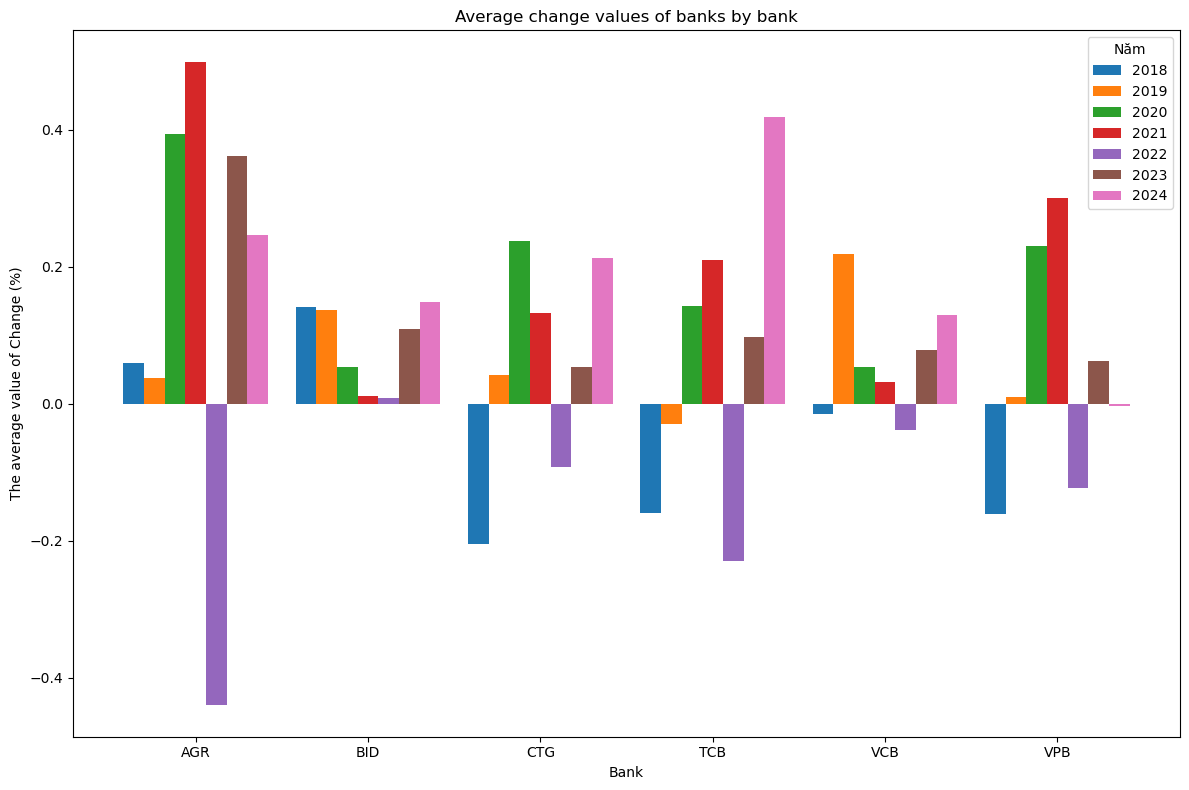

In [24]:
# Tạo biểu đồ cột
fig, ax = plt.subplots(figsize=(12, 8))

# Tạo danh sách các ngân hàng và các năm
banks = df['Bank'].unique()
years = df['Year'].unique()
num_banks = len(banks)
bar_width = 0.12
index = np.arange(num_banks)

# Vẽ cột cho mỗi năm
for i, year in enumerate(years):
    avg_prices = df[df['Year'] == year]['Average Change'].values
    ax.bar(index + i * bar_width, avg_prices, bar_width, label=year.astype(str))
    # ax.bar(index + i * bar_width, avg_prices, bar_width, label=year)

# Đặt nhãn và chú thích
ax.set_xlabel('Bank')
ax.set_ylabel('The average value of Change (%)')
ax.set_title('Average change values of banks by bank')
ax.set_xticks(index + (len(years) - 1) * bar_width / 2)
ax.set_xticklabels(banks)
ax.legend(title='Năm')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [25]:
def plot_price_over_time_for_stock(df, stock_code):
    """
    Vẽ biểu đồ giá theo thời gian cho mã cổ phiếu cụ thể
    với nhãn trục x không bị chồng lấn.
    
    Args:
    - df: DataFrame chứa dữ liệu.
    - stock_code: Mã cổ phiếu cần vẽ biểu đồ.
    """
    # Đảm bảo cột Date ở định dạng datetime và là index
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

    # Lọc dữ liệu theo mã cổ phiếu
    stock_data = df[df['Stock symbol'] == stock_code]

    # Nếu không có dữ liệu cho mã cổ phiếu, hiển thị thông báo và thoát khỏi hàm
    if stock_data.empty:
        print(f"Không tìm thấy dữ liệu cho mã cổ phiếu: {stock_code}")
        return

    # Lấy tên ngân hàng từ cột Bank
    bank_name = stock_data['Bank'].iloc[0]

    # Tạo biểu đồ
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Price'], mode='lines', name=bank_name))

    # Định dạng nhãn trục x
    fig.update_xaxes(tickformat="%m/%Y", dtick="M2")  # Hiển thị nhãn mỗi 2 tháng

    # Cài đặt các thông tin cơ bản của biểu đồ
    fig.update_layout(
        title=f'Price Over Time for {bank_name}',
        xaxis_title='Time',
        yaxis_title='Price (VND)',
        legend_title='Legend',
        template='plotly'
    )

    # Hiển thị biểu đồ
    fig.show()

#### **Nhận xét và phân tích sự thay đổi trung bình của các ngân hàng theo thời gian**
- Ngân hàng Agribank:<br>
    - Có sự biến động lớn qua các năm, từ mức thấp nhất là -0.42% năm 2022 đến mức cao nhất là 0.50% năm 2021.<br>
    - Nhìn chung, giá trị trung bình (change %) của Agribank có xu hướng tăng từ năm 2023 trở đi.<br><br>
- Ngân hàng BIDV:<br>
    - Giá trị trung bình khá ổn định với mức tăng trưởng nhẹ qua các năm, dao động từ 0.01% đến 0.17%.<br>
    - Không có năm nào giá trị trung bình (change %) của BIDV dưới 0.<br><br>
- Ngân hàng VietinBank:<br>
    - Có một số năm giá trị trung bình (change %) âm như năm 2018 (-0.22%) và 2022 (-0.05%).<br>
    - Tuy nhiên, từ năm 2020 trở đi, VietinBank có xu hướng tăng dần, đạt mức cao nhất là 0.26% vào năm 2024.<br><br>
- Ngân hàng Techcombank:<br>
    - Techcombank có xu hướng giá trị trung bình (change %) tăng từ năm 2019 (-0.03%) đến 2024 (0.48%).<br>
    - Đặc biệt, năm 2022 giá trị trung bình (change %) giảm mạnh xuống -0.23% nhưng phục hồi nhanh chóng trong những năm tiếp theo.<br><br>
- Ngân hàng Vietcombank:<br>
    - Giá trị trung bình (change %) của Vietcombank khá ổn định và luôn duy trì ở mức dương, dao động từ 0.02% đến 0.22%.<br>
    - Đặc biệt, năm 2019 có mức tăng cao nhất là 0.22%.<br><br>
- Ngân hàng VPBank:<br>
    - Giá trị trung bình change (%) có sự biến động lớn và không đồng đều qua các năm, với một số năm tăng và một số năm giảm. Dao động từ -0.16 (năm 2018) đến 0.3 (năm 2021). <br><br>
    
***Tổng kết***<br>
- Xu hướng chung: Phần lớn các ngân hàng có xu hướng tăng giá trị trung bình (change %) qua các năm, đặc biệt là từ năm 2020 trở đi.<br>
- Sự biến động: Một số ngân hàng như AGR và CTG có sự biến động mạnh qua các năm, trong khi BIDV và Vietcombank có xu hướng ổn định hơn.<br>
- Năm nổi bật: Năm 2024 là năm mà hầu hết các ngân hàng đều đạt mức giá trị trung bình (change %) cao nhất trong giai đoạn từ 2018 đến 2024.<br>


#### **Biểu diễn giá trị trung bình (Change %) Chi tiết 1 năm hoặc 1 ngân hàng nào đó**

In [26]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('../Datasets/average_change_data.csv')

# Tạo hàm để vẽ biểu đồ
def plot_chart(year=None, bank=None):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    if year:
        df_year = df[df['Year'] == year]
        banks = df_year['Bank'].unique()
        index = np.arange(len(banks))
        bar_width = 0.35
        for i, bank in enumerate(banks):
            avg_prices = df_year[df_year['Bank'] == bank]['Average Change'].values
            ax.bar(index[i], avg_prices, bar_width, label=bank)
        ax.set_xticks(index)
        ax.set_xticklabels(banks)
        ax.set_title(f'Giá trị trung bình của các ngân hàng năm {year}')
    elif bank:
        df_bank = df[df['Bank'] == bank]
        years = df_bank['Year'].unique()
        index = np.arange(len(years))
        bar_width = 0.35
        for i, year in enumerate(years):
            avg_price = df_bank[df_bank['Year'] == year]['Average Change'].values[0]
            ax.bar(index[i], avg_price, bar_width, label=year)
        ax.set_xticks(index)
        ax.set_xticklabels(years)
        ax.set_title(f'Giá trị trung bình của ngân hàng {bank} qua các năm')
    ax.set_xlabel('Năm hoặc Ngân hàng')
    ax.set_ylabel('Giá trị trung bình (%)')
    ax.legend()
    plt.show()

# Tạo dropdown để chọn năm
year_dropdown = widgets.Dropdown(
    options=list(df['Year'].unique()),
    description='Năm:',
    disabled=False,
)

# Tạo dropdown để chọn ngân hàng
bank_dropdown = widgets.Dropdown(
    options=list(df['Bank'].unique()),
    description='Ngân hàng:',
    disabled=False,
)

# Tạo button để vẽ biểu đồ theo năm
year_button = widgets.Button(description="Vẽ theo Năm")

# Tạo button để vẽ biểu đồ theo ngân hàng
bank_button = widgets.Button(description="Vẽ theo Ngân hàng")

# Hàm xử lý sự kiện khi nhấn nút vẽ theo năm
def on_year_button_clicked(b):
    plot_chart(year=year_dropdown.value)

# Hàm xử lý sự kiện khi nhấn nút vẽ theo ngân hàng
def on_bank_button_clicked(b):
    plot_chart(bank=bank_dropdown.value)

# Gán hàm xử lý sự kiện cho các nút
year_button.on_click(on_year_button_clicked)
bank_button.on_click(on_bank_button_clicked)

# Hiển thị các widget và nút
display(year_dropdown, year_button)
display(bank_dropdown, bank_button)


Dropdown(description='Năm:', options=(2018, 2019, 2020, 2021, 2022, 2023, 2024), value=2018)

Button(description='Vẽ theo Năm', style=ButtonStyle())

Dropdown(description='Ngân hàng:', options=('AGR', 'BID', 'CTG', 'TCB', 'VCB', 'VPB'), value='AGR')

Button(description='Vẽ theo Ngân hàng', style=ButtonStyle())

### **3. Phân tích sự biến động giá cổ phiếu của các ngân hàng**

In [27]:
# Xem dữ liệu đã đọc từ file CSV
data.head(5)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
0,2018-06-04,10633.7,10028.5,10633.7,10028.5,18000000.0,6.96,VPB,VPBank
1,2018-06-04,44960.0,42837.0,45187.0,42458.0,4900000.0,4.04,VCB,Vietcombank
2,2018-06-04,23343.0,22195.0,23419.5,21735.7,6140000.0,2.69,BID,BIDV
3,2018-06-04,3425.1,3307.0,3425.1,3218.4,112900.0,6.75,AGR,Agribank
4,2018-06-04,20839.3,20429.2,20951.1,20168.3,7570000.0,1.82,CTG,VietinBank


In [28]:
# set Date là index
data.set_index('Date', inplace = True)
data.head(5)

,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
Date,,,,,,,,
2018-06-04,10633.7,10028.5,10633.7,10028.5,18000000.0,6.96,VPB,VPBank
2018-06-04,44960.0,42837.0,45187.0,42458.0,4900000.0,4.04,VCB,Vietcombank
2018-06-04,23343.0,22195.0,23419.5,21735.7,6140000.0,2.69,BID,BIDV
2018-06-04,3425.1,3307.0,3425.1,3218.4,112900.0,6.75,AGR,Agribank
2018-06-04,20839.3,20429.2,20951.1,20168.3,7570000.0,1.82,CTG,VietinBank


In [29]:
# Lấy danh sách các mã cổ phiếu duy nhất trong dữ liệu
unique_stock_codes = data['Stock symbol'].unique()

# Vẽ biểu đồ cho từng mã cổ phiếu
for code in unique_stock_codes:
    plot_price_over_time_for_stock(data, code)

### Từ những biểu đồ trên, ta rút trích ra được 2 câu hỏi cụ thể như sau:

- **3.1. Phân tích sự biến động giá cổ phiếu của VPBank, Agribank, Vietinbank, Techcombank vào năm 2021** 
    > (vì sau khi plot những biểu đồ về giá cổ phiếu qua thời gian thì thấy năm 2021 có sự tăng đột ngột về giá của các ngân hàng này)

- **3.2. Phân tích sự biến động giá cổ phiếu của VPBank, Agribank, VietinBank, Techombank vào năm 2022** 
    > (vì sau khi plot những biểu đồ về giá cổ phiếu qua thời gian thì thấy cuối năm 2022 có sự giảm đột ngột về giá, giảm xuống mức thấp nhất của các ngân hàng từ đầu 2021 trở đi)
<!-- 3. Những ngày có thay đổi phần trăm giá (Change %) lớn nhất có trùng với các sự kiện quan trọng nào trong thị trường hay không? -->

#### **3.1. Phân tích sự biến động giá cổ phiếu của VPBank, Agribank, VietinBank, Techcombank vào năm 2021**

In [30]:
# Lọc dữ liệu cho các cổ phiếu AGR, CTG, TCB vào năm 2021
stocks = ['VPB', 'AGR', 'CTG', 'TCB']
data_2021 = data[(data.index.year == 2021) & (data['Stock symbol'].isin(stocks))]

data_2021

,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
Date,,,,,,,,
2021-01-04,33000.0,32000.0,33400.0,31900.0,18610000.0,4.76,TCB,Techcombank
2021-01-04,12666.8,12185.3,12666.8,12055.7,22640000.0,5.23,VPB,VPBank
2021-01-04,8740.0,8661.3,8917.2,8543.1,3370000.0,3.26,AGR,Agribank
2021-01-04,26847.7,26469.6,27225.8,26393.9,18120000.0,2.75,CTG,VietinBank
2021-01-05,33050.0,32750.0,33350.0,32550.0,14280000.0,0.15,TCB,Techcombank
...,...,...,...,...,...,...,...,...
2021-12-30,25245.6,24409.0,25245.6,24113.7,3640000.0,6.88,AGR,Agribank
2021-12-31,23866.7,23666.7,24133.3,23633.3,16840000.0,1.13,VPB,VPBank
2021-12-31,50000.0,49500.0,50500.0,49450.0,9550000.0,1.42,TCB,Techcombank


##### **3.1.1. Moving Average**

Sử dụng `Moving Average` để làm mượt dữ liệu chuỗi thời gian

`Moving Average (MA)` hay còn gọi là Trung Bình Động, là một công cụ phân tích kỹ thuật dùng để làm mượt dữ liệu giá và xác định xu hướng của giá cổ phiếu trong một khoảng thời gian nhất định. Trong hàm plot_moving_average, chúng ta đã sử dụng Moving Average để làm mượt và phân tích xu hướng giá của cổ phiếu.

> Chi tiết hơn về Moving Average sẽ được trình bày trong file `C-Data-exploration-03.ipynb`, trong phạm vi câu hỏi này chỉ sử dụng để làm mượt và phân tích xu hướng, không đi sâu vào mô hình. 

In [31]:
def plot_moving_average(df, stock_code, window=30):
    """
    Vẽ biểu đồ giá cổ phiếu và 30-day Moving Average cho một mã cổ phiếu cụ thể.

    Args:
    - df: DataFrame chứa dữ liệu.
    - stock_code: Mã cổ phiếu cần vẽ biểu đồ.
    - window: Số ngày để tính Moving Average (mặc định là 30).
    """
    # Lọc dữ liệu cho mã cổ phiếu
    stock_data = df[df['Stock symbol'] == stock_code]['Price']
    
    # Nếu không có dữ liệu cho mã cổ phiếu, hiển thị thông báo và thoát khỏi hàm
    if stock_data.empty:
        print(f"Không tìm thấy dữ liệu cho mã cổ phiếu: {stock_code}")
        return

    # Lấy tên ngân hàng từ cột Bank
    bank_name = df[df['Stock symbol'] == stock_code]['Bank'].iloc[0]

    # Tính Moving Average
    moving_average = stock_data.rolling(window=window).mean()

    # Tạo biểu đồ
    fig = go.Figure()

    # Vẽ giá cổ phiếu
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data, mode='lines', name=f'Price of {bank_name}'))
    
    # Vẽ Moving Average
    fig.add_trace(go.Scatter(x=moving_average.index, y=moving_average, mode='lines', name=f'MA Price of {stock_code} {window}-day'))

    # Định dạng nhãn trục x
    fig.update_xaxes(tickformat="%m/%Y", dtick="M2")  # Hiển thị nhãn mỗi 2 tháng

    # Cài đặt các thông tin cơ bản của biểu đồ
    fig.update_layout(
        title=f'Price and MA Price of {bank_name}',
        xaxis_title='Time',
        yaxis_title='Price (VND)',
        legend_title='Legend',
        template='plotly'
    )

    # Hiển thị biểu đồ
    fig.show()

##### **3.1.2. VPBank**

In [32]:
plot_moving_average(data_2021, 'VPB')


| Từ viết tắt | Giải thích                                     |
|-------------|------------------------------------------------|
| NIM         | Biên lãi thuần (Net Interest Margin)           |
| CAR         | Tỷ lệ an toàn vốn tối thiểu (Capital Adequacy Ratio) |
| ROE         | Tỷ suất sinh lợi trên vốn (Return on Equity)   |
| ROA         | Tỷ suất sinh lợi trên tài sản (Return on Assets) |
| SME         | Doanh nghiệp vừa và nhỏ (Small and Medium Enterprises) |
| VCSH        | Vốn chủ sở hữu                                 |
| CASA        | Tỷ lệ tiền gửi không kỳ hạn (Current Account Savings Account) |

Lý do:

- Chiến lược linh hoạt và số hóa:
  - VPBank tập trung vào phân khúc bán lẻ với chiến lược cho vay tiêu dùng, dẫn đầu thị trường với thị phần 55% trong mảng này. Chiến lược này đã giúp VPBank duy trì biên lãi thuần (NIM) cao nhất ngành.
  - Ngân hàng cũng đẩy mạnh công tác thu hồi nợ thông qua công cụ số hóa và tăng cường số hóa hành trình trải nghiệm khách hàng, cung cấp các dịch vụ tài chính đa dạng.
- Kiểm soát chất lượng tín dụng: VPBank đã giảm tỷ lệ cho vay tín chấp để kiểm soát chất lượng tín dụng tốt hơn, đồng thời tăng cường cho vay phân khúc khách hàng doanh nghiệp.
- Tăng trưởng vốn chủ sở hữu và lợi nhuận: VPBank ghi nhận mức tăng trưởng tín dụng bình quân 5 năm là hơn 20%, và giữ vững tỷ lệ an toàn vốn tối thiểu (CAR) ở mức an toàn. Ngân hàng cũng đạt tỷ suất sinh lợi trên vốn (ROE) cao nhất thị trường với 27,9% trong 9 tháng năm 2021.

Kết quả đạt được:

- Tăng vốn điều lệ: VPBank đã tăng vốn điều lệ và hoàn thành thương vụ chuyển nhượng 49% vốn điều lệ của FE Credit cho Tập đoàn Sumitomo Mitsui, giúp CAR dự kiến đạt mức 17%.
- Tăng trưởng lợi nhuận: ROE của VPBank đạt 27,9%, ROA đạt 3,05% trong 9 tháng năm 2021, thuộc nhóm dẫn đầu thị trường.
- Nâng tầm vị thế chiến lược: VPBank dự kiến phát hành thêm 15% cho cổ đông chiến lược vào cuối năm 2021 - đầu năm 2022, nâng giá trị vốn chủ sở hữu lên mức 120 nghìn tỷ đồng, trở thành ngân hàng có vốn điều lệ lớn nhất ngành.

[Nguồn để đối chiếu](https://thoibaotaichinhvietnam.vn/vpb-su-tro-lai-cua-co-phieu-dan-dau-96175.html)

##### **3.1.3. Agribank**

In [33]:
plot_moving_average(data_2021, 'AGR')

Lý do ([Nguồn để đối chiếu](https://cafef.vn/chung-khoan-agribank-agr-lai-rong-quy-4-tang-gap-5-lan-cung-ky-lnst-ca-nam-2021-xap-xi-400-ty-dong-vuot-23-ke-hoach-20220119094850741.chn)): 
- Trong năm 2021, hoạt động cho vay và phải thu của AGR đóng góp 33% doanh thu hoạt động.
- Mảng môi giới cũng bứt phá gần gấp 3 lần cùng kỳ năm trước (quý 4/2020)
- Chi phí hoạt động trong quý 4/2021 lại được tiết giảm mạnh 57% và chi phí quản lý công ty giảm 54% so với quý 4 năm trước.
- Hồi tháng 10/2021, HĐQT Agriseco đã thông qua việc điều chỉnh kế hoạch kinh doanh năm 2021 giúp tăng lên.

Kết quả đạt được:
- CTCP Chứng khoán Agribank (HOSE: AGR) công bố lợi nhuận sau thuế 6 tháng đầu năm 2021 đạt 294 tỷ đồng, gấp gần 7 lần cùng kỳ 2020, xóa toàn bộ lỗ lũy kế. Doanh thu đạt 344 tỷ đồng, vượt 134% kế hoạch và lợi nhuận trước thuế 312 tỷ đồng, vượt 242% kế hoạch năm. EPS 4 quý đạt 1,650 đồng/cổ phiếu, với giá cổ phiếu AGR hiện giao dịch quanh mức 13,300 đồng/cổ phiếu. [Nguồn để đối chiếu](https://vietstock.vn/2021/08/chung-khoan-agribank-agr-lai-gap-doi-sau-soat-xet-dat-312-ty-dong-737-882420.htm)

- Cho đến giữa năm là tháng 6 bắt đầu có sự tăng trưởng đột biến và chạm đỉnh ở vào cuối năm 2021. Cụ thể: Tổng vốn của AgriBank tăng lên 7.0 tỷ USD vào ngày 31/12/2021, tăng 426.4 triệu USD so với năm trước, chủ yếu nhờ vào thu nhập ròng và phát hành cổ phiếu. Tiền mặt và đầu tư đạt 19.7 tỷ USD, với thanh khoản đủ để trang trải nợ đến hạn trong 158 ngày, vượt xa mức tối thiểu 90 ngày. AgriBank đã vượt tất cả các yêu cầu vốn quy định. [Nguồn để đối chiếu](https://www.prnewswire.com/news-releases/agribank-reports-fourth-quarter-2021-and-year-end-financial-results-301494235.html)

##### **3.1.4. VietinBank**

In [34]:
plot_moving_average(data_2021, 'CTG')

| Từ viết tắt | Giải thích                                                               |
|-------------|--------------------------------------------------------------------------|
| YoY         | Year over Year, so sánh giữa cùng kỳ của hai năm liên tiếp (năm nay so với năm trước). |
| QoQ         | Quarter over Quarter, so sánh giữa hai quý liên tiếp (quý này so với quý trước).         |
| NII         | Net Interest Income, thu nhập lãi thuần.                                 |
| TOI         | Total Operating Income, tổng thu nhập hoạt động.                         |


Lý do ([Nguồn để đối chiếu](https://www.vietinbank.vn/vn/tin-tuc/Hoi-nghi-cap-nhat-ket-qua-kinh-doanh-nam-2021-cua-VietinBank-Thuc-day-tang-truong-dot-pha-trong-boi-canh-nen-kinh-te-phuc-hoi-20220401192708.html)):
- Sự tăng trưởng mạnh mẽ về NII và TOI, cùng với các sáng kiến ​​chiến lược như hợp tác độc quyền với Manulife và kế hoạch thoái vốn đã mang lại cơ hội tăng trưởng.
- Kết quả kinh doanh tích cực năm 2021: VietinBank đã đạt những kết quả kinh doanh rất tích cực, với dư nợ tín dụng tăng mạnh, tỷ trọng dư nợ sinh lời cao như Bán lẻ và DN vừa và nhỏ tăng từ 54% lên 57%.
- Kiểm soát rủi ro và tối ưu hóa chi phí: VietinBank đã kiểm soát tốt tỷ lệ nợ xấu ở mức 1,26% và tăng cường trích lập dự phòng rủi ro, tỷ lệ bao nợ xấu đạt 180,4%. Chi phí hoạt động (CIR) duy trì ở mức thấp, chỉ 30,1%, cho thấy việc quản lý chi phí hiệu quả.
- Đầu tư vào công nghệ số và dịch vụ ngân hàng điện tử: VietinBank đã tăng trưởng mạnh mẽ về số lượng và giá trị giao dịch qua kênh điện tử, với 652 triệu giao dịch và 9,1 triệu tỷ đồng. Điều này cho thấy ngân hàng đang đẩy mạnh chuyển đổi số và cải thiện trải nghiệm khách hàng, giúp tăng trưởng doanh thu từ dịch vụ.
- Chính sách hỗ trợ khách hàng và cộng đồng: VietinBank đã chi hơn 11,8 nghìn tỷ đồng cho chương trình tái cơ cấu dư nợ và các hoạt động hỗ trợ cộng đồng trong bối cảnh đại dịch COVID-19. Điều này không chỉ tăng cường lòng tin của nhà đầu tư mà còn giúp VietinBank củng cố vai trò và trách nhiệm xã hội.

Kết quả đạt được:
- Lợi nhuận quý 1 của VietinBank (CTG) tăng vọt lên 6.462 tỷ đồng (+167,6% YoY, +20,6% QoQ), đây là kết quả hoạt động mạnh nhất của công ty kể từ khi niêm yết. Dư nợ tín dụng giảm nhẹ so với quý trước (không đổi QoQ) nhưng vẫn cải thiện mạnh so với cùng kỳ năm trước (+8,3% YoY). [Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_CTG_Update_1Q2021.pdf)

- NII quý 2 của VietinBank (CTG) là 10.879 tỷ đồng (+2,2% QoQ, +39,5% YoY) và TOI đạt 14.083 tỷ đồng (+9,0% QoQ, +41,2% YoY). [Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_Updated_CTG_2Q2021.pdf)

##### **3.1.5. Techcombank**

In [35]:
plot_moving_average(data_2021, 'TCB')

| Từ viết tắt | Giải thích                              |
|-------------|------------------------------------------|
| YoY         | Year over Year, so sánh theo năm         |
| LNTT        | Lợi nhuận trước thuế                     |
| TOI         | Tổng thu nhập hoạt động                  |
| ROA         | Return on Assets, lợi nhuận trên tài sản |
| NIM         | Net Interest Margin, biên lãi thuần      |
| CASA        | Current Account Savings Account, tỷ lệ tiền gửi không kỳ hạn |
| NFI         | Net Fee Income, thu nhập phí thuần       |
| NII         | Net Interest Income, thu nhập lãi thuần  |

Lý do ([Nguồn để đối chiếu](https://voh.com.vn/kinh-te/techcombank-cong-bo-ket-qua-kinh-doanh-2021-ty-le-casa-vuot-50-424726.html)):

- Kết quả kinh doanh ấn tượng cho thấy sự tăng trưởng và khả năng sinh lời của ngân hàng.
- Tăng trưởng về tỷ lệ CASA giúp Techcombank giảm chi phí huy động vốn và tăng cường lợi nhuận.
- Quản lý rủi ro và chi phí hợp lý: Ngân hàng duy trì chi phí hoạt động ở mức thấp cho thấy Techcombank đang quản lý hiệu quả và tối ưu hóa các hoạt động.
- Đầu tư vào công nghệ số và dịch vụ ngân hàng điện tử: Techcombank đã tăng trưởng mạnh mẽ về số lượng và giá trị giao dịch qua kênh điện tử, lên tới 652 triệu giao dịch và 9,1 triệu tỷ đồng. Việc ra mắt ứng dụng Techcombank Mobile mới cũng là một yếu tố quan trọng giúp thu hút thêm khách hàng và tăng trưởng doanh thu từ dịch vụ.
- Dư nợ tín dụng và tiền gửi tăng mạnh: cho thấy Techcombank đang mở rộng cả về dư nợ cho vay và tiền gửi.
- Chính sách hỗ trợ khách hàng và cộng đồng: Techcombank đã chi hơn 11,8 nghìn tỷ đồng cho chương trình tái cơ cấu dư nợ và các hoạt động hỗ trợ cộng đồng trong bối cảnh đại dịch COVID-19. Điều này tăng cường lòng tin của cả nhà đầu tư và khách hàng về sự bền vững và trách nhiệm xã hội của ngân hàng.

Kết quả đạt được ([Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_FTM_TCB_Eng_20220126.pdf)): 
- Techcombank (TCB) ghi nhận kết quả kinh doanh ấn tượng năm 2021 với lợi nhuận trước thuế (LNTT) đạt 23.238 tỷ đồng (+47,1% YoY) và tổng thu nhập hoạt động (TOI) đạt 37.076 tỷ đồng (+37,1% YoY). Tỷ lệ lợi nhuận trên tài sản (ROA) tăng lên 3,7% từ 3,1% năm 2020. Biên lãi thuần (NIM) đạt 5,6% trong quý 4 năm 2021 nhờ tối ưu hóa chi phí vốn và tăng tỷ lệ CASA lên 50,5%. Thu nhập phí thuần (NFI) tăng 42% YoY. Tỷ lệ nợ xấu năm 2021 ở mức 0,7%, thấp so với tiêu chuẩn ngành, và các khoản nợ được cơ cấu lại giảm đáng kể xuống còn 1,9 nghìn tỷ đồng. 

#### **3.2. Phân tích sự biến động giá cổ phiếu của VPBank, Agribank, VietinBank, Techcombank vào năm 2022**

In [36]:
# Lấy data năm 21, 22
data_21_22 = data[(data.index.year >= 2021) & (data.index.year <= 2022)]

data_21_22

,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
Date,,,,,,,,
2021-01-04,33000.0,32000.0,33400.0,31900.0,18610000.0,4.76,TCB,Techcombank
2021-01-04,12666.8,12185.3,12666.8,12055.7,22640000.0,5.23,VPB,VPBank
2021-01-04,38186.5,37790.8,38344.8,37790.8,2510000.0,0.73,BID,BIDV
2021-01-04,76645.0,75871.0,77264.0,75329.0,1090000.0,1.12,VCB,Vietcombank
2021-01-04,8740.0,8661.3,8917.2,8543.1,3370000.0,3.26,AGR,Agribank
...,...,...,...,...,...,...,...,...
2022-12-30,7228.1,7324.5,7324.5,7228.1,149000.0,0.00,AGR,Agribank
2022-12-30,25850.0,25950.0,26100.0,25850.0,2180000.0,-0.39,TCB,Techcombank
2022-12-30,34253.0,35717.0,36827.0,34253.0,2950000.0,-3.50,BID,BIDV


##### **3.2.1. VPBank**

In [37]:
plot_moving_average(data_21_22, 'VPB')

| Từ viết tắt | Giải thích |
|-------------|------------|
| VPB         | Mã cổ phiếu của Ngân hàng TMCP Việt Nam Thịnh Vượng (VPBank) |
| TOI         | Total Operating Income (Thu nhập hoạt động) |
| NIM         | Net Interest Margin (Biên lãi thuần) |
| ROE         | Return on Equity (Lợi nhuận trên vốn chủ sở hữu) |
| ROA         | Return on Assets (Lợi nhuận trên tổng tài sản) |
| CIR         | Cost-to-Income Ratio (Tỷ lệ chi phí trên thu nhập) |
| CAR         | Capital Adequacy Ratio (Tỷ lệ an toàn vốn tối thiểu) |
| SME         | Small and Medium Enterprises (Doanh nghiệp vừa và nhỏ) |

Lý do:

- Chi phí dự phòng rủi ro tăng cao: Chi phí dự phòng quý 4/2022 của VPBank tăng 31% so với cùng kỳ, đạt 7.320 tỷ đồng. Sự gia tăng này ảnh hưởng đáng kể đến lợi nhuận ròng của ngân hàng.
- Chi phí hoạt động tăng: Chi phí hoạt động trong quý 4/2022 tăng 42% lên 4.065 tỷ đồng. Việc tăng chi phí hoạt động làm giảm hiệu quả kinh doanh và lợi nhuận của ngân hàng.
- Lỗ từ mảng kinh doanh ngoại hối: Mảng kinh doanh ngoại hối bị lỗ 340 tỷ đồng trong quý 4/2022, làm giảm tổng thu nhập của ngân hàng.
- Thách thức từ môi trường kinh tế vĩ mô: Tăng lãi suất từ Ngân hàng Nhà nước và áp lực kiểm soát lạm phát đã làm tăng chi phí vốn vay, ảnh hưởng đến lợi nhuận ngân hàng.

Kết quả:

- Lợi nhuận trước thuế giảm: Lợi nhuận trước thuế quý 4/2022 chỉ đạt 1.383 tỷ đồng, giảm 47% so với cùng kỳ năm 2021.
- Thu nhập hoạt động tăng: Thu nhập lãi thuần tăng 20,6%, lãi từ hoạt động dịch vụ tăng 57%, và lãi từ hoạt động khác tăng 54% so với cùng kỳ năm trước.
- Lợi nhuận cả năm 2022: Dù lợi nhuận quý 4/2022 giảm, VPBank vẫn ghi nhận lợi nhuận trước thuế cả năm 2022 tăng 47,7% so với năm 2021, đạt 21.219 tỷ đồng.
- Hiệu quả hoạt động: Ngân hàng mẹ đạt lợi nhuận trước thuế hơn 24.000 tỷ đồng, với các chỉ số hiệu quả như ROA đạt 3,7%, ROE đạt 25,6%, và CIR đạt 19,3%, nằm trong top dẫn đầu thị trường.

[Nguồn để đối chiếu](https://cafeland.vn/tin-tuc/loi-nhuan-quy-42022-cua-vpbank-sut-giam-dang-ke-116904.html)


##### **3.2.2. Agribank**

In [38]:
plot_moving_average(data_21_22, 'AGR')

Lý do ([Nguồn 1](https://baodautu.vn/quy-ii2022-loi-nhuan-chung-khoan-agribank-giam-916-ve-con-2154-ty-dong-d169535.html) [Nguồn 2](https://markettimes.vn/quy-2-2022-cac-nguon-thu-ngoai-lai-cua-agribank-giam-manh-3287.html)): 

- Thị trường chứng khoán khó khăn: Thị trường chứng khoán Việt Nam trong nửa đầu năm 2022 đang đối mặt với nhiều thách thức do tác động của dịch COVID-19, các biến động về giá cả và chính sách tiền tệ.
- Giảm mạnh thu nhập từ các nguồn khác: Trong quý 2/2022, doanh thu tài chính ghi nhận giảm mạnh thu nhập khác từ 149 tỷ đồng xuống còn 8,6 tỷ đồng. Đây là một phần lớn do cùng kỳ năm trước ghi nhận thu nhập từ việc chuyển nhượng khoản đầu tư góp vốn vào Công ty Hoàng Anh Gia Lai, năm nay không có khoản thu nhập tương tự.
- Giảm doanh thu từ các hoạt động chính: Các hoạt động môi giới, lãi/lỗ tài sản tài chính và lãi các khoản đầu tư nắm giữ đến ngày đáo hạn đều giảm so với cùng kỳ năm trước. Ví dụ, lãi các tài sản tài chính ghi nhận thông qua lãi/lỗ (FVTPL) giảm từ 15,8 tỷ đồng về 9,2 tỷ đồng.
- Chi phí hoạt động tăng lên: Dù có sự giảm chi phí quản lý từ 38 tỷ đồng xuống 13 tỷ đồng, chi phí hoạt động tổng thể vẫn tăng lên mức 47 tỷ đồng so với cùng kỳ âm 68 tỷ đồng. Điều này đóng góp vào việc giảm lợi nhuận sau thuế mạnh mẽ.
- Tăng cường trích lập dự phòng: Agribank đã tiến hành trích lập chi phí dự phòng rủi ro tín dụng, mặc dù giảm xuống còn 7.508,8 tỷ đồng trong nửa đầu năm 2022 (giảm 40,6% so với cùng kỳ năm trước), nhưng việc này vẫn ảnh hưởng đến lợi nhuận.
- Nợ xấu tăng mạnh: Agribank ghi nhận mức tăng mạnh của nợ xấu, với tỷ lệ nợ xấu tăng từ 1,87% vào cuối năm ngoái lên 2,15% khi kết thúc nửa đầu năm. Điều này cũng góp phần làm giảm lợi nhuận của ngân hàng.
- Dòng tiền hoạt động kinh doanh và đầu tư âm lớn: Dòng tiền hoạt động kinh doanh và đầu tư của Agribank ghi nhận số âm lớn, với dòng tiền thuần âm tới gần 85.000 tỷ đồng, điều này phản ánh khó khăn trong quản lý tài chính và dòng tiền của ngân hàng.


Kết quả ([Nguồn để đối chiếu](https://kinhtechungkhoan.vn/stores/customer_file/tannt/032023/24/Agriseco_-_Bao_cao_trien_vong_loi_nhuan_Q1.2023.pdf)):
- Lợi nhuận Q4.2022 của các doanh nghiệp trên cả 3 sàn giảm 32,6% so với cùng kỳ, đây là mức giảm mạnh nhất từ sau đại dịch Covid-19. Trong đó, khối tài chính chỉ giảm nhẹ 0,9% về lợi nhuận với nhóm ngân hàng vẫn tăng trưởng 18% trong Q4.2022. Khối phi tài chính có lợi nhuận sụt giảm mạnh lên đến 50% so với Q4.2021 với sự đi xuống của hầu hết các nhóm ngành bao gồm bán lẻ, bất động sản, xây dựng và vật liệu,… 

##### **3.2.3. VietinBank**

In [39]:
plot_moving_average(data_21_22, 'CTG')

### Vietinbank

| Từ viết tắt | Giải thích                              |
|-------------|------------------------------------------|
| NII         | Thu nhập lãi thuần                       |
| QoQ         | Quarter over Quarter, so sánh theo quý   |
| YoY         | Year over Year, so sánh theo năm         |

Lý do ([Nguồn 1](https://baodautu.vn/vietinbank-loi-nhuan-quy-i2022-giam-manh-tay-trich-lap-du-phong-bao-phu-no-xau-gan-200-d164950.html) [Nguồn 2](https://markettimes.vn/quy-1-2022-loi-nhuan-truoc-thue-cua-vietinbank-tang-truong-am-2038.html)):

- Lợi nhuận giảm mạnh trong Quý I/2022: VietinBank ghi nhận lợi nhuận trước thuế giảm đến 27,8% so với cùng kỳ năm trước. Điều này là do nguồn thu chính của ngân hàng giảm 4,7%, trong khi chi phí dự phòng rủi ro tăng mạnh gấp 3 lần. Điều này khiến cổ phiếu CTG bị ảnh hưởng bởi kết quả kinh doanh kém hơn dự kiến.
- Giảm sâu từ đầu tháng 4/2022: Cổ phiếu CTG giảm mạnh từ đầu tháng 4/2022, tức là từ khi công bố báo cáo tài chính Quý I/2022 của ngân hàng, giảm tới 24,36%, tương đương với mức giảm 8.050 đồng/cổ phiếu. Việc giảm này phản ánh sự lo ngại của thị trường đối với kết quả kinh doanh và triển vọng của VietinBank.
- Nợ xấu tăng mạnh: Tại cuối Quý I/2022, tổng nợ xấu nội bảng của VietinBank tăng đến 71,1% so với cùng kỳ năm trước, lên mức 15.321,5 tỷ đồng. Trong đó, các khoản nợ xấu nhóm 3 (nợ dưới tiêu chuẩn), nhóm 4 (nợ nghi ngờ) và nhóm 5 (nợ có khả năng mất vốn) đều tăng đáng kể. Điều này cho thấy ngân hàng đang gặp khó khăn trong việc quản lý tín dụng và rủi ro tín dụng, khiến nhà đầu tư lo ngại về khả năng phục hồi lợi nhuận trong tương lai.
- Hoạt động kinh doanh không khả quan: Mặc dù lãi thuần từ kinh doanh ngoại hối và hoạt động khác tăng mạnh, nhưng lãi thuần từ mua bán chứng khoán kinh doanh lại giảm sâu. Điều này cho thấy sự biến động lớn trong các hoạt động kinh doanh của ngân hàng, không đảm bảo sự ổn định trong lợi nhuận.

Kết quả ([Nguồn để đối chiếu](https://www.kbsec.com.vn/pic/Service/KBSV_1Q22Update_CTG_Eng_20220517.pdf)):

- Trong quý đầu năm 2022, Vietinbank (CTG) đạt được thu nhập lãi thuần (NII) là 10.146 tỷ đồng (-2,4% QoQ, -4,7% YoY). 

##### **3.2.4. Techcombank**

In [40]:
plot_moving_average(data_21_22, 'TCB')

Lý do:

- Chi phí vốn tăng: nguyên nhân chính của chi phí vốn tăng đến từ việc các ngân hàng trung ương trên toàn cầu tăng mạnh lãi suất nhiều lần trong năm 2022 và thanh khoản trong hệ thống bớt dồi dào hơn so với những năm trước.
- Điều này dẫn tới việc tăng lãi suất tiền gửi có kỳ hạn, tăng chi phí vốn trên cả thị trường cũng như làm giảm số dư tiền gửi không kỳ hạn (CASA) trong tổng cơ cấu tiền gửi của ngân hàng.
- Khả năng tăng trích lập dự phòng: Techcombank đã tăng trích lập dự phòng so với năm trước, lên 691 tỷ đồng, có thể do áp lực từ môi trường kinh tế khó khăn.
- Cơ cấu nguồn thu của Techcombank: Lãi thuần từ hoạt động dịch vụ giảm gần 400 tỷ đồng. Hoạt động ngoại hối và mua bán chứng khoán kinh doanh đều ghi nhận lỗ.
  
Kết quả:

- Tổng giá trị tài sản của Techcombank tăng 23% so với đầu năm, đạt gần 700 nghìn tỷ đồng, tuy nhiên lợi nhuận quý 4 giảm mạnh và CASA giảm dẫn đến tăng chi phí vốn. Nguyên nhân chính của chi phí vốn tăng là do các ngân hàng trung ương tăng mạnh lãi suất nhiều lần trong năm 2022. Tại cuối năm 2022, Techcombank có 373.000 khách hàng mới, tuy nhiên chi phí hoạt động cả năm tăng 20% lên 13,4 nghìn tỷ đồng, chủ yếu do chi phí marketing và công nghệ.

[Nguồn để đối chiếu](https://cafebiz.vn/loi-nhuan-techcombank-giam-hon-20-quy-4-2022-xuong-thap-nhat-9-quy-176230203104859967.chn)